In [1]:
import pandas as pd
import seaborn as sns

In [2]:
assets = pd.read_csv('/home/tugcenum/Desktop/jobapplication/joyn/exercise/assets.csv')
assets

,A_TYPE,A_DURATION_SEC,A_SEASON_NUM,A_EPISODE_NUM,ASSET_ID,A_TITLE_ID
0,1,5880,0,0,a_2xI,at_bSo
1,1,5460,0,0,a_6Cp,at_bSn
2,1,5820,0,0,a_4ql,at_bSm
3,2,6780,1,1,a_2yn,at_bSl
4,1,5280,0,0,a_Pi,at_bSk
...,...,...,...,...,...,...
45652,2,1440,1,2,a_51z,at_f
45653,2,1380,1,7,a_4mP,at_f
45654,1,4860,0,0,a_6gT,at_2
45655,1,4980,0,0,a_8Rc,at_1


In [3]:
usages = pd.read_csv('/home/tugcenum/Desktop/jobapplication/joyn/exercise/usages.csv')
print("# of users in usages: ",len(usages.SUB_ID.unique()))
usages

# of users in usages:  254525


,SUB_ID,ASSET_ID,USAGE_DATETIME,USAGE_DURATION_SEC,DEVICE_CATEGORY
0,s_8dVB,a_eG,2019-03-20 21:08:46.000,1336,MOBILE
1,s_8dVB,a_eG,2019-03-20 19:20:49.000,1224,MOBILE
2,s_8dVB,a_vl,2019-04-19 20:07:47.000,158,MOBILE
3,s_8dVB,a_1ID,2019-04-04 20:30:39.000,2460,MOBILE
4,s_8dVB,a_1Kp,2019-04-19 20:03:00.000,164,MOBILE
...,...,...,...,...,...
17472078,s_8cLa,a_1f0,2019-06-17 21:30:29.000,1356,PC
17472079,s_8cLa,a_1MX,2019-06-17 21:03:43.000,1402,PC
17472080,s_wLd,a_1f0,2019-06-17 21:48:03.000,138,STB
17472081,s_wLd,a_1MX,2019-06-17 21:20:36.000,1510,STB


In [4]:
#select randomly k users from data
import random
k = 1000
users = usages.SUB_ID.unique()
randomlist = random.sample(range(0, len(users)), k)
selected_users = users[randomlist]

usages = usages[usages.SUB_ID.isin(selected_users)]
print(len(usages.SUB_ID.unique()))
usages

1000


,SUB_ID,ASSET_ID,USAGE_DATETIME,USAGE_DURATION_SEC,DEVICE_CATEGORY
60754,s_44yB,a_CA,2019-04-17 21:18:11.000,88,PC
60755,s_44yB,a_CA,2019-03-02 16:08:08.000,184,MOBILE
60756,s_44yB,a_CA,2019-03-17 18:12:27.000,1968,OTT
60757,s_44yB,a_II,2019-04-06 18:27:55.000,800,PC
60758,s_44yB,a_Pv,2019-04-02 18:26:57.000,1166,PC
...,...,...,...,...,...
17470267,s_1cw9,a_3WJ,2019-06-16 21:58:12.000,1298,STB
17471223,s_6ILj,a_1f0,2019-06-17 18:37:03.000,1362,STB
17471224,s_6ILj,a_1MX,2019-06-17 18:13:10.000,1404,STB
17471225,s_6ILj,a_3WJ,2019-06-17 18:59:32.000,1298,STB


In [5]:
#only get movies
assets = assets[assets.A_TYPE == 1]
usages = usages.merge(assets[['ASSET_ID','A_TITLE_ID']], on = ['ASSET_ID'], how = 'inner')
len(usages),len(assets)

(10213, 3295)

In [6]:
# group by A_TITLE_ID and get users watched more than 5
user_content = usages.groupby(['SUB_ID','A_TITLE_ID'])['USAGE_DURATION_SEC'].sum().reset_index()
movie_count = user_content.SUB_ID.value_counts().reset_index()
movie_count = movie_count[movie_count.SUB_ID >5]
user_content = user_content[user_content.SUB_ID.isin(movie_count['index'])]
len(user_content)

5665

In [7]:
#get duration of the contents
total_duration = assets.groupby('A_TITLE_ID')['A_DURATION_SEC'].sum().reset_index()
total_duration.rename(columns={'A_DURATION_SEC':'total_duration'},inplace=True)
total_duration

,A_TITLE_ID,total_duration
0,at_0,5100
1,at_1,4980
2,at_101,5400
3,at_102,5400
4,at_10X,5580
...,...,...
3287,at_zA,2580
3288,at_zD,5400
3289,at_zE,5760
3290,at_zF,5460


In [8]:
user_content.isna().sum()

SUB_ID                0
A_TITLE_ID            0
USAGE_DURATION_SEC    0
dtype: int64

In [9]:
# interaction_level is defined based on rate of time users watched the contents to the content total duration 
user_content = user_content.merge(total_duration, on = 'A_TITLE_ID', how = 'left')
user_content['interaction'] = user_content.USAGE_DURATION_SEC / user_content.total_duration
user_content['interaction'] = user_content['interaction'].apply(lambda x: 1 if x>1 else x)
user_content['interaction_level'] = user_content['interaction'].apply(lambda x: round(4*x)+1)
user_content

,SUB_ID,A_TITLE_ID,USAGE_DURATION_SEC,total_duration,interaction,interaction_level
0,s_10un,at_13X,114,4920,0.023171,1
1,s_10un,at_2fi,1566,4380,0.357534,2
2,s_10un,at_3Vl,992,5040,0.196825,2
3,s_10un,at_3hX,1822,4500,0.404889,3
4,s_10un,at_6BT,1450,5040,0.287698,2
...,...,...,...,...,...,...
5660,s_zWw,at_70G,1938,5640,0.343617,2
5661,s_zWw,at_8Em,5126,5100,1.000000,5
5662,s_zWw,at_8Eo,1230,4920,0.250000,2
5663,s_zWw,at_9Y4,580,5100,0.113725,1


In [10]:
user_content.isna().sum()

SUB_ID                0
A_TITLE_ID            0
USAGE_DURATION_SEC    0
total_duration        0
interaction           0
interaction_level     0
dtype: int64

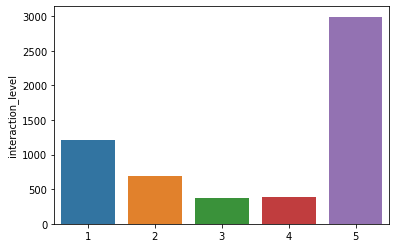

In [11]:
#interaction level distribution
sns.barplot(x=user_content.interaction_level.value_counts().index, y=user_content.interaction_level.value_counts())

In [12]:
# randomly train and test set selected
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(user_content,
                                   test_size=0.20,
                                   random_state=42)
len(train_data), len(test_data), len(test_data)/len(train_data)

(4532, 1133, 0.25)

In [13]:
# SUB_ID and SUB_ID_index table created from train_data
users = train_data[['SUB_ID']].drop_duplicates()
users = users.reset_index().drop(['index'], axis = 1)
users['SUB_ID_index'] = users.index
print('total number of users:',len(users))
len(users), users.SUB_ID_index.max()

total number of users: 329


(329, 328)

In [14]:
#A_TITLE_ID and A_TITLE_ID_index table created from train_data
contents = train_data[['A_TITLE_ID']].drop_duplicates()
contents = contents.reset_index().drop(['index'], axis = 1)
contents['A_TITLE_ID_index'] = contents.index
print('total number of contents:',len(contents))
len(contents), contents.A_TITLE_ID_index.max()

total number of contents: 1229


(1229, 1228)

In [15]:
train_data

,SUB_ID,A_TITLE_ID,USAGE_DURATION_SEC,total_duration,interaction,interaction_level
4109,s_7HbK,at_8kP,5960,5940,1.000000,5
670,s_22RD,at_1lg,5662,5760,0.982986,5
3493,s_6COn,at_7cZ,5686,5640,1.000000,5
3527,s_6Hbf,at_bKD,452,7260,0.062259,1
3551,s_6M3j,at_7y,290,5160,0.056202,1
...,...,...,...,...,...,...
3772,s_6iZg,at_8kP,3310,5940,0.557239,3
5191,s_JAx,at_aht,6576,6420,1.000000,5
5226,s_OQq,at_4Nh,5152,8460,0.608983,3
5390,s_r1h,at_12d,642,7320,0.087705,1


In [16]:
# SUB_ID_index and A_TITLE_ID_index are appended to train and test data. 
#Only user and contents in the train set are kept
train_data = train_data.merge(users, on = 'SUB_ID', how = 'left')
train_data = train_data.merge(contents, on = 'A_TITLE_ID', how = 'left')

test_data = test_data.merge(users, on = 'SUB_ID', how = 'inner')
test_data = test_data.merge(contents, on = 'A_TITLE_ID', how = 'inner')
#test_data = test_data.dropna()
len(train_data),len(train_data)

(4532, 4532)

In [17]:
#final data sets
train_df = train_data[['SUB_ID','A_TITLE_ID','SUB_ID_index','A_TITLE_ID_index','interaction_level']]
test_df = test_data[['SUB_ID','A_TITLE_ID','SUB_ID_index','A_TITLE_ID_index','interaction_level']]
print("# of interaction in train: ",len(train_df))
print("# of interaction in test: ",len(test_df))
print("# of users in train data: ", len(train_df.SUB_ID.unique()))
print("# of users in test data: ", len(test_df.SUB_ID.unique()))
print("# of contents in train data: ", len(train_df.A_TITLE_ID.unique()))
print("# of contents in test data: ", len(test_df.A_TITLE_ID.unique()))

# of interaction in train:  4532
# of interaction in test:  1005
# of users in train data:  329
# of users in test data:  294
# of contents in train data:  1229
# of contents in test data:  467


In [18]:
# save as pkl
users.to_pickle('r_movie_user_data_'+str(k)+'.pkl')
contents.to_pickle('r_movie_content_data_'+str(k)+'.pkl')
train_df.to_pickle('r_movie_train_df_'+str(k)+'.pkl')
test_df.to_pickle('r_movie_test_df_'+str(k)+'.pkl')

In [19]:
# save as csv
users.to_csv('r_movie_user_data_'+str(k)+'.csv', index=False)  
contents.to_csv('r_movie_content_data_'+str(k)+'.csv', index=False)  
train_df.to_csv('r_movie_train_df_'+str(k)+'.csv', index=False)  
test_df.to_csv('r_movie_test_df_'+str(k)+'.csv', index=False)  